In [58]:
#importando bibliotecas
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split

## Função treino

Foi-se separado as funcionalidades do nosso algoritmo em duas funções: teste e treino. A função treino abaixo tem dois parâmentros: *trein* que representa a parte do banco de dados que foi separada para o treino e *k* que representa o indice do dicinario com k bits. Ela retorna o dicionario resultante do treinamento utilizando os dois paramentros.

In [59]:
def treino(trein, k):
    dicionario = {}
    novoValor = 256
    novo = ''
    antigo = ''
    
    for i in range(2**8):
        dicionario[i.to_bytes(1, 'big')] = i
    
    for mensagem in trein: 
        for letra in mensagem: #compressão
            novo = antigo + letra

            if novo.encode('ISO-8859-1') not in dicionario: 
                if len(dicionario) < 2**k:
                    dicionario[novo.encode('ISO-8859-1')] = novoValor
                    novoValor += 1
                else:
                    break

                antigo = letra
            else:
                antigo = novo
        if len(dicionario) >= 2**k:
            break
        
    return dicionario

## Função teste

A função de teste recebe dois paramentros: mensagem e dicionario. Sendo mensagem a representação de uma amostra da parte separada do banco de dados para os testes que nesse caso é um som e dicionario a representação de um dicionario que já passou pela fase de treinamento. Sendo assim, a função abaixo retorna o tamanho do som, recebida como parametro, comprimida.

In [60]:
def teste(mensagem, dicionario):
    msgComp = []
    novo = ''
    antigo = ''

    for letra in mensagem:
        novo = antigo + letra

        if novo.encode('ISO-8859-1') not in dicionario: 

            numCod = dicionario[antigo.encode('ISO-8859-1')]
            msgComp.append(numCod)

            antigo = letra
        else:
            antigo = novo

    numCod = dicionario[antigo.encode('ISO-8859-1')]
    msgComp.append(numCod)

    return len(msgComp)

## Reconhcendo os padrões

Para a implementação a abaixo, foi-se declarado a variavel K que representa uma lista com valores entre 9 e 16 que são os tamanhos de bits para serem testados nos indices do dicionario, utilizou-se a variavel tempo para a medição do tempo de execução do algoritmo e a variável acertos representa a quantidade de vezes de quando a decodificação dos sons testados deram certo com o dicionario feito pela função de treino.

In [61]:
K = [9,10,11,12,13,14,15,16]
instrumentos = ["cel", "cla", "flu", "gac", "gel", "org", "pia", "sax", "tru", "vio"]
acertos = []
tempo = []

for k in range(9, 17): 
    inicio = time.time()
    testes = []
    dicionario = []
    nAcertos = 0

    for i in instrumentos: 
        som = []
        
        for j in range(0, 100): # quantidade de sons presente em cada pasta de cada instrumento
            arquivo = open("IRMAS-TrainingData_red/"+ i + "/" + i + str(j+1) + ".wav", "rb").read()[14:]
            arquivo = arquivo.decode('ISO-8859-1')
            som.append(arquivo)

        trein, test = train_test_split(som, test_size=0.1, random_state=np.random) 
        testes.append(test[0])
        dicionario.append(treino(trein, k))
        
####  Reconhecendo os padrões   ####
    for i in range(len(testes)):
        menor = 10000000
        
        for j in range(len(dicionario)):
            tam = teste(testes[i], dicionario[j])
            
            if(tam < menor):
                menor = tam
                indice = j
                
        if(i == indice):
            nAcertos += 1

    print("RESULTADO: K = " +str(k)+ " -> acertos: "+str(nAcertos))
    acertos.append(nAcertos)

    fim = time.time()
    tempo.append(fim-inicio)

RESULTADO: K = 9 -> acertos: 1
RESULTADO: K = 10 -> acertos: 1
RESULTADO: K = 11 -> acertos: 0
RESULTADO: K = 12 -> acertos: 1
RESULTADO: K = 13 -> acertos: 0
RESULTADO: K = 14 -> acertos: 1
RESULTADO: K = 15 -> acertos: 3
RESULTADO: K = 16 -> acertos: 3


## Gerando Gráficos

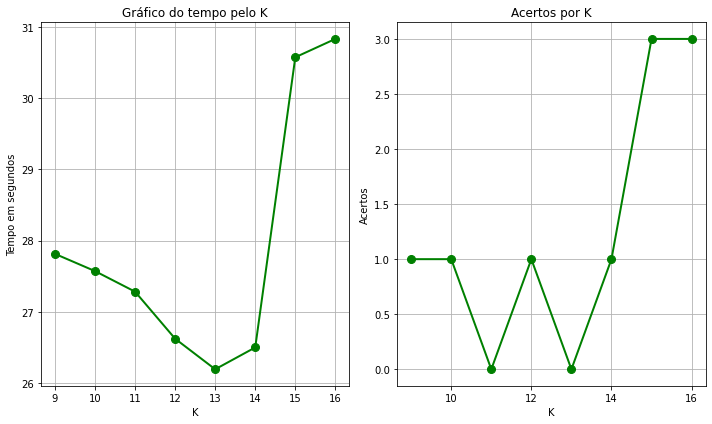

In [62]:
# Gráfico do tempo pelo K
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 6))
ax[0].plot(K, tempo, 'go-', linewidth=2, markersize=8)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[0].set(xlabel='K', ylabel='Tempo em segundos', title='Gráfico do tempo pelo K')
ax[0].grid()

# Gráfico de Acertos por K
ax[1].plot(K, acertos, 'go-', linewidth=2, markersize=8)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(base=2.0))
ax[1].set(xlabel='K', ylabel='Acertos', title='Acertos por K')
ax[1].grid()

plt.tight_layout()
plt.show()